In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df = pd.read_csv("D:/python/practice/NBA/data/Houston Rockets at Golden State Warriors Box Score, October 17, 2017.csv")

<AxesSubplot:title={'center':'Houston Starters Box score'}>

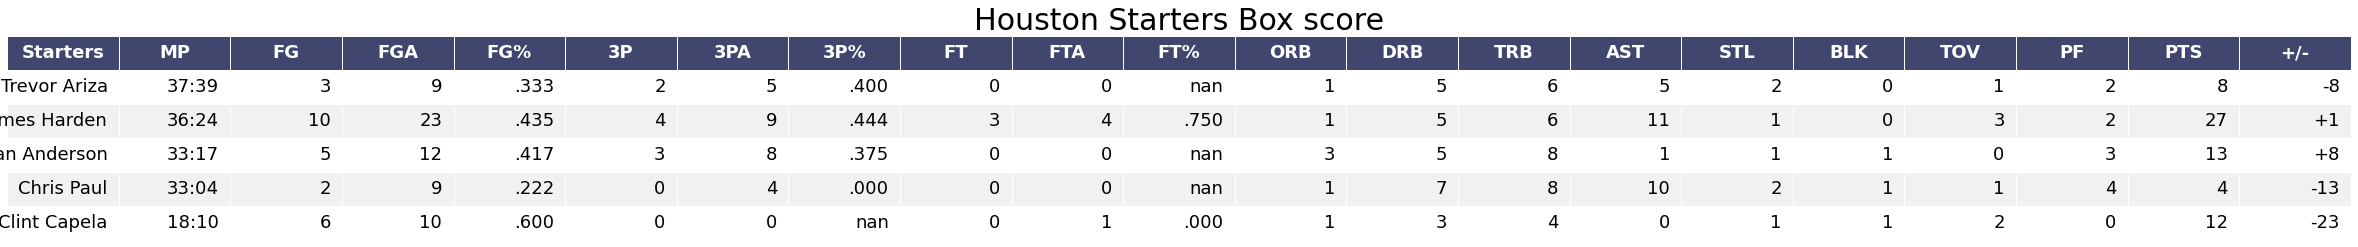

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=18,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax.set_title("Houston Starters Box score")
    ax.title.set_size(30)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df.head(), header_columns=0, col_width=2.0)

In [33]:
if 'Chris Paul' in df["Starters"].tolist():
    df["CP3"] = 1
df

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3
0,Trevor Ariza,37:39,3,9,.333,2,5,.400,0,0,...,5,6,5,2,0,1,2,8,-8,1
1,James Harden,36:24,10,23,.435,4,9,.444,3,4,...,5,6,11,1,0,3,2,27,+1,1
2,Ryan Anderson,33:17,5,12,.417,3,8,.375,0,0,...,5,8,1,1,1,0,3,13,+8,1
3,Chris Paul,33:04,2,9,.222,0,4,.000,0,0,...,7,8,10,2,1,1,4,4,-13,1
4,Clint Capela,18:10,6,10,.600,0,0,NaN,0,1,...,3,4,0,1,1,2,0,12,-23,1
5,Reserves,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,1
6,Eric Gordon,29:23,9,16,.563,0,6,.000,6,8,...,1,1,1,1,2,2,1,24,+16,1
7,P.J. Tucker,28:40,6,9,.667,4,6,.667,4,6,...,5,6,0,1,0,1,3,20,+20,1
8,Luc Mbah a Moute,23:23,6,9,.667,2,3,.667,0,0,...,2,4,0,0,0,2,1,14,+4,1
9,Zhou Qi,Did Not Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [35]:
df.query('Starters == "James Harden"')[
    ["Starters", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "+/-", "CP3"]
]

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3
1,James Harden,36:24,10,23,.435,4,9,.444,6,11,1,0,3,2,27,+1,1


In [37]:
import requests
from bs4 import BeautifulSoup
re = requests.get("https://www.basketball-reference.com/teams/HOU/2018_games.html")
soup = BeautifulSoup(re.text, "html.parser")
body = soup.tbody
game_list = []
for tr in body.find_all("td"):
    td = tr.find_all("a")
    try:
        if td[0]['href'][0:12] == "/boxscores/2":
            print("https://www.basketball-reference.com" + td[0]['href'])
            game_list.append("https://www.basketball-reference.com" + td[0]['href'])
    except Exception:
        href='' 

https://www.basketball-reference.com/boxscores/201710170GSW.html
https://www.basketball-reference.com/boxscores/201710180SAC.html
https://www.basketball-reference.com/boxscores/201710210HOU.html
https://www.basketball-reference.com/boxscores/201710230HOU.html
https://www.basketball-reference.com/boxscores/201710250PHI.html
https://www.basketball-reference.com/boxscores/201710270CHO.html
https://www.basketball-reference.com/boxscores/201710280MEM.html
https://www.basketball-reference.com/boxscores/201710300HOU.html
https://www.basketball-reference.com/boxscores/201711010NYK.html
https://www.basketball-reference.com/boxscores/201711030ATL.html
https://www.basketball-reference.com/boxscores/201711050HOU.html
https://www.basketball-reference.com/boxscores/201711090HOU.html
https://www.basketball-reference.com/boxscores/201711110HOU.html
https://www.basketball-reference.com/boxscores/201711120IND.html
https://www.basketball-reference.com/boxscores/201711140HOU.html
https://www.basketball-re

In [98]:
for i in range(1,83):
    re = requests.get(game_list[i-1])
    soup = BeautifulSoup(re.text, "html.parser")
    title = soup.findAll('h1')[0].getText()
    name = game_list[i-1]
    path = "D:/python/practice/NBA/data"
    Path = f"{path}" + "/" + f"{title}" + ".csv"
    df = pd.read_csv(Path)
    df["G"] = i
    if 'Chris Paul' in df["Starters"].tolist():
        df["CP3"] = 1
    else :
        df["CP3"] = 0
    if 'James Harden' in df["Starters"].tolist():
        df_JH = df.query('Starters == "James Harden"')[
        ["Starters", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "+/-", "CP3", "G"]
        ]
        path = "D:/python/practice/NBA/data/temp"
        Path = f"{path}" + "/" + f"JH_{i}" + "temp.csv"
        #print(Path)
        df_JH.to_csv(Path, index = False)
    else:
        df_JH = df.iloc[[0]][
        ["Starters", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "+/-", "CP3", "G"]
        ]
        path = "D:/python/practice/NBA/data/temp"
        Path = f"{path}" + "/" + f"JH_{i}" + "temp.csv"
        #print(Path)
        df_JH.to_csv(Path, index = False)

In [99]:
df = pd.read_csv("D:/python/practice/NBA/data/temp/JH_1temp.csv")
for i in range(2,83):
    exec(f'df_{i} = pd.read_csv(f"D:/python/practice/NBA/data/temp/JH_{i}temp.csv")')
    exec(f'df = df.append(df_{i}, ignore_index=True)')

In [100]:
df

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3,G
0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,11.0,1.0,0.0,3.0,2.0,27.0,1.0,1,1
1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,9.0,2.0,0.0,2.0,1.0,27.0,1.0,1,2
2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,7.0,2.0,0.0,5.0,5.0,29.0,31.0,0,3
3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,8.0,1.0,0.0,7.0,4.0,22.0,-14.0,0,4
4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,13.0,1.0,3.0,8.0,1.0,27.0,9.0,0,5
5,James Harden,36:56,8.0,18.0,0.444,4.0,10.0,0.400,10.0,11.0,1.0,0.0,5.0,4.0,27.0,-1.0,0,6
6,James Harden,33:37,6.0,19.0,0.316,2.0,9.0,0.222,4.0,8.0,2.0,0.0,3.0,3.0,20.0,-13.0,1,7
7,James Harden,38:27,8.0,21.0,0.381,3.0,7.0,0.429,4.0,7.0,4.0,1.0,7.0,2.0,29.0,-12.0,0,8
8,James Harden,34:47,9.0,23.0,0.391,6.0,17.0,0.353,5.0,9.0,0.0,0.0,7.0,5.0,31.0,21.0,0,9
9,James Harden,30:56,8.0,15.0,0.533,6.0,11.0,0.545,3.0,11.0,1.0,0.0,2.0,0.0,29.0,19.0,0,10


In [91]:
df = pd.read_csv("D:/python/practice/NBA/data/temp/JH_35temp.csv")
df_36 = pd.read_csv(f"D:/python/practice/NBA/data/temp/JH_36temp.csv")
df = df.append(df_35, ignore_index=True)
df

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3,G
0,James Harden,40:47,10,20,0.5,3,8,0.375,2,11,2,2,1,2,40,4,1,35
1,James Harden,40:47,10,20,0.5,3,8,0.375,2,11,2,2,1,2,40,4,1,35


In [49]:
df_10

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3,G
0,James Harden,30:56,8,15,0.533,6,11,0.545,3,11,1,0,2,0,29,19,0,10


In [101]:
pd.set_option("max_rows", None)
#pd.reset_option("max_rows")
df

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3,G
0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,11.0,1.0,0.0,3.0,2.0,27.0,1.0,1,1
1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,9.0,2.0,0.0,2.0,1.0,27.0,1.0,1,2
2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,7.0,2.0,0.0,5.0,5.0,29.0,31.0,0,3
3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,8.0,1.0,0.0,7.0,4.0,22.0,-14.0,0,4
4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,13.0,1.0,3.0,8.0,1.0,27.0,9.0,0,5
5,James Harden,36:56,8.0,18.0,0.444,4.0,10.0,0.400,10.0,11.0,1.0,0.0,5.0,4.0,27.0,-1.0,0,6
6,James Harden,33:37,6.0,19.0,0.316,2.0,9.0,0.222,4.0,8.0,2.0,0.0,3.0,3.0,20.0,-13.0,1,7
7,James Harden,38:27,8.0,21.0,0.381,3.0,7.0,0.429,4.0,7.0,4.0,1.0,7.0,2.0,29.0,-12.0,0,8
8,James Harden,34:47,9.0,23.0,0.391,6.0,17.0,0.353,5.0,9.0,0.0,0.0,7.0,5.0,31.0,21.0,0,9
9,James Harden,30:56,8.0,15.0,0.533,6.0,11.0,0.545,3.0,11.0,1.0,0.0,2.0,0.0,29.0,19.0,0,10


In [111]:
df.query('Starters == "James Harden"')[['TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].describe()

,TRB,AST,STL,BLK,TOV,PF,PTS
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,5.402778,8.750000,1.750000,0.694444,4.375000,2.347222,30.430556
std,2.683595,2.920303,1.308154,0.704890,2.132495,1.425717,9.167958
min,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,10.000000
25%,3.000000,7.000000,1.000000,0.000000,3.000000,1.000000,25.750000
50%,5.000000,8.500000,2.000000,1.000000,4.000000,2.000000,28.000000
75%,7.000000,11.000000,2.000000,1.000000,6.000000,3.000000,35.250000
max,11.000000,17.000000,6.000000,3.000000,10.000000,6.000000,60.000000


In [112]:
df.corr()

,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3,G
FG,1.000000,0.746366,0.739037,0.561767,0.211711,0.603846,-0.073193,0.069589,0.016869,0.014103,0.123377,0.172489,0.901873,0.117385,-0.130760,-0.153268
FGA,0.746366,1.000000,0.176741,0.420127,0.496154,0.239570,-0.001731,0.025969,-0.001770,0.036044,0.111638,0.266124,0.773667,-0.074924,-0.101194,-0.221683
FG%,0.739037,0.176741,1.000000,0.460517,-0.086775,0.696453,-0.103063,0.114833,0.000521,-0.000218,0.130053,0.032071,0.592589,0.274617,-0.098995,-0.007394
3P,0.561767,0.420127,0.460517,1.000000,0.623751,0.799342,0.002539,0.090038,-0.048027,-0.006303,-0.043140,0.121763,0.578292,0.362479,-0.233678,-0.313492
3PA,0.211711,0.496154,-0.086775,0.623751,1.000000,0.083943,0.166521,0.130085,0.057472,-0.003314,-0.047005,0.135436,0.331638,0.284822,-0.173525,-0.280666
3P%,0.603846,0.239570,0.696453,0.799342,0.083943,1.000000,-0.138259,0.035640,-0.117481,-0.038892,0.006935,0.069793,0.553686,0.263546,-0.155604,-0.165655
TRB,-0.073193,-0.001731,-0.103063,0.002539,0.166521,-0.138259,1.000000,0.041309,0.063375,-0.110643,0.008222,-0.110407,0.010159,0.189620,0.061165,0.164547
AST,0.069589,0.025969,0.114833,0.090038,0.130085,0.035640,0.041309,1.000000,0.187309,-0.055368,0.057977,0.027626,0.092002,0.106896,-0.249240,-0.112570
STL,0.016869,-0.001770,0.000521,-0.048027,0.057472,-0.117481,0.063375,0.187309,1.000000,-0.006320,0.034573,-0.053998,0.023841,-0.086567,0.017240,-0.028064
BLK,0.014103,0.036044,-0.000218,-0.006303,-0.003314,-0.038892,-0.110643,-0.055368,-0.006320,1.000000,0.034715,-0.200628,0.005026,-0.149611,0.076817,0.127767


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  82 non-null     object 
 1   MP        82 non-null     object 
 2   FG        78 non-null     float64
 3   FGA       78 non-null     float64
 4   FG%       78 non-null     float64
 5   3P        78 non-null     float64
 6   3PA       78 non-null     float64
 7   3P%       78 non-null     float64
 8   TRB       78 non-null     float64
 9   AST       78 non-null     float64
 10  STL       78 non-null     float64
 11  BLK       78 non-null     float64
 12  TOV       78 non-null     float64
 13  PF        78 non-null     float64
 14  PTS       78 non-null     float64
 15  +/-       78 non-null     float64
 16  CP3       82 non-null     int64  
 17  G         82 non-null     int64  
dtypes: float64(14), int64(2), object(2)
memory usage: 11.7+ KB


In [117]:
df.to_csv("D:/python/practice/NBA/data/JH.csv")

In [2]:
df_JH = pd.read_csv("D:/python/practice/NBA/data/JH.csv")
df_team = pd.read_csv("D:/python/practice/NBA/data/team.csv")

In [3]:
df_team.head()

,G,Date,Start (ET),1,box_score,away,Opponent,WL,2,Tm,Opp,W,L,Streak,3
0,1,"Tue, Oct 17, 2017",10:30p,NaN,Box Score,@,Golden State Warriors,W,NaN,122,121,1,0,W 1,NaN
1,2,"Wed, Oct 18, 2017",10:00p,NaN,Box Score,@,Sacramento Kings,W,NaN,105,100,2,0,W 2,NaN
2,3,"Sat, Oct 21, 2017",8:00p,NaN,Box Score,NaN,Dallas Mavericks,W,NaN,107,91,3,0,W 3,NaN
3,4,"Mon, Oct 23, 2017",8:00p,NaN,Box Score,NaN,Memphis Grizzlies,L,NaN,90,98,3,1,L 1,NaN
4,5,"Wed, Oct 25, 2017",7:00p,NaN,Box Score,@,Philadelphia 76ers,W,NaN,105,104,4,1,W 1,NaN


In [4]:
df_JH.head()

,Unnamed: 0,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,CP3,G
0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,11.0,1.0,0.0,3.0,2.0,27.0,1.0,1,1
1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,9.0,2.0,0.0,2.0,1.0,27.0,1.0,1,2
2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,7.0,2.0,0.0,5.0,5.0,29.0,31.0,0,3
3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,8.0,1.0,0.0,7.0,4.0,22.0,-14.0,0,4
4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,13.0,1.0,3.0,8.0,1.0,27.0,9.0,0,5


In [3]:
df_team = df_team[["G", "away", "WL", "Tm", "Opp"]]
df_team["Away"] = df_team["away"].apply(lambda x: 1 if x == "@" else 0)
df_team = df_team.drop(["away"], axis = 1)
df_team["Win"] = df_team["WL"].apply(lambda x: 1 if x == "W" else 0)
df_team = df_team.drop(["WL"], axis = 1)
df_team

,G,Tm,Opp,Away,Win
0,1,122,121,1,1
1,2,105,100,1,1
2,3,107,91,0,1
3,4,90,98,0,0
4,5,105,104,1,1
...,...,...,...,...,...
77,78,120,104,0,1
78,79,96,94,0,1
79,80,102,108,0,0
80,81,105,99,1,1


In [4]:
df = pd.merge(df_JH, df_team, on = "G")
df

,Unnamed: 0,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,...,TOV,PF,PTS,+/-,CP3,G,Tm,Opp,Away,Win
0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,...,3.0,2.0,27.0,1.0,1,1,122,121,1,1
1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,...,2.0,1.0,27.0,1.0,1,2,105,100,1,1
2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,...,5.0,5.0,29.0,31.0,0,3,107,91,0,1
3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,...,7.0,4.0,22.0,-14.0,0,4,90,98,0,0
4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,...,8.0,1.0,27.0,9.0,0,5,105,104,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,...,3.0,1.0,38.0,17.0,1,78,120,104,0,1
78,78,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,...,8.0,0.0,24.0,7.0,1,79,96,94,0,1
79,79,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,...,5.0,5.0,26.0,2.0,1,80,102,108,0,0
80,80,James Harden,30:51,6.0,15.0,0.400,3.0,7.0,0.429,4.0,...,6.0,0.0,21.0,0.0,1,81,105,99,1,1


In [5]:
#df["JH"] = df["Starters"].apply(lambda x : 1 if x == "James Harden" or  else 0)
def f(x):
    if x[0] != "James Harden" or x[1]  == "Did Not Play":
        return 0
    else:
        return 1
df["JH"] = df[["Starters", "MP"]].apply(lambda x: f(x), axis=1 )
df

,Unnamed: 0,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,...,PF,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH
0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,...,2.0,27.0,1.0,1,1,122,121,1,1,1
1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,...,1.0,27.0,1.0,1,2,105,100,1,1,1
2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,...,5.0,29.0,31.0,0,3,107,91,0,1,1
3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,...,4.0,22.0,-14.0,0,4,90,98,0,0,1
4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,...,1.0,27.0,9.0,0,5,105,104,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,...,1.0,38.0,17.0,1,78,120,104,0,1,1
78,78,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,...,0.0,24.0,7.0,1,79,96,94,0,1,1
79,79,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,...,5.0,26.0,2.0,1,80,102,108,0,0,1
80,80,James Harden,30:51,6.0,15.0,0.400,3.0,7.0,0.429,4.0,...,0.0,21.0,0.0,1,81,105,99,1,1,1


In [6]:
df["JH"].value_counts()

1    72
0    10
Name: JH, dtype: int64

In [39]:
df.groupby(['JH','Win']).size().reset_index(name='count')

,JH,Win,count
0,0,0,4
1,0,1,6
2,1,0,13
3,1,1,59


<AxesSubplot:title={'center':"Correlation Between James Harden's Points and Game Win"}>

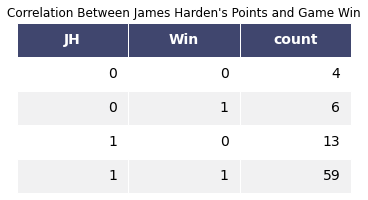

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax.set_title("Correlation Between James Harden's Points and Game Win")

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df.groupby(['JH','Win']).size().reset_index(name='count'), header_columns=0, col_width=2.0)

In [12]:
df.to_csv("D:/python/practice/NBA/data/JHteam.csv")

In [7]:
df[["JH", "CP3", "Away", "Win"]].corr()

,JH,CP3,Away,Win
JH,1.000000,-0.146690,-0.149071,0.177137
CP3,-0.146690,1.000000,0.035783,-0.024758
Away,-0.149071,0.035783,1.000000,-0.090249
Win,0.177137,-0.024758,-0.090249,1.000000


In [8]:
df_onlyJH = df.drop(df.loc[df["Starters"] != "James Harden"].index)
df_onlyJH = df_onlyJH.drop(df.loc[df["MP"] == "Did Not Play"].index)

df_onlyJH


,Unnamed: 0,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,...,PF,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH
0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,...,2.0,27.0,1.0,1,1,122,121,1,1,1
1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,...,1.0,27.0,1.0,1,2,105,100,1,1,1
2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,...,5.0,29.0,31.0,0,3,107,91,0,1,1
3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,...,4.0,22.0,-14.0,0,4,90,98,0,0,1
4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,...,1.0,27.0,9.0,0,5,105,104,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,James Harden,35:57,8.0,19.0,0.421,1.0,6.0,0.167,3.0,...,5.0,25.0,-19.0,1,77,83,100,1,0,1
77,77,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,...,1.0,38.0,17.0,1,78,120,104,0,1,1
78,78,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,...,0.0,24.0,7.0,1,79,96,94,0,1,1
79,79,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,...,5.0,26.0,2.0,1,80,102,108,0,0,1


In [23]:
df_onlyJH

,Unnamed: 0,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,...,PF,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH
0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,...,2.0,27.0,1.0,1,1,122,121,1,1,1
1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,...,1.0,27.0,1.0,1,2,105,100,1,1,1
2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,...,5.0,29.0,31.0,0,3,107,91,0,1,1
3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,...,4.0,22.0,-14.0,0,4,90,98,0,0,1
4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,...,1.0,27.0,9.0,0,5,105,104,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,James Harden,35:57,8.0,19.0,0.421,1.0,6.0,0.167,3.0,...,5.0,25.0,-19.0,1,77,83,100,1,0,1
77,77,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,...,1.0,38.0,17.0,1,78,120,104,0,1,1
78,78,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,...,0.0,24.0,7.0,1,79,96,94,0,1,1
79,79,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,...,5.0,26.0,2.0,1,80,102,108,0,0,1


In [9]:
df_onlyJH = df_onlyJH.reset_index(drop=True)

In [10]:
df_onlyJH

,Unnamed: 0,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,...,PF,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH
0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,...,2.0,27.0,1.0,1,1,122,121,1,1,1
1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,...,1.0,27.0,1.0,1,2,105,100,1,1,1
2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,...,5.0,29.0,31.0,0,3,107,91,0,1,1
3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,...,4.0,22.0,-14.0,0,4,90,98,0,0,1
4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,...,1.0,27.0,9.0,0,5,105,104,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,76,James Harden,35:57,8.0,19.0,0.421,1.0,6.0,0.167,3.0,...,5.0,25.0,-19.0,1,77,83,100,1,0,1
68,77,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,...,1.0,38.0,17.0,1,78,120,104,0,1,1
69,78,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,...,0.0,24.0,7.0,1,79,96,94,0,1,1
70,79,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,...,5.0,26.0,2.0,1,80,102,108,0,0,1


In [11]:
df_onlyJH.to_csv("D:/python/practice/NBA/data/onlyJH_team.csv")

In [34]:
df_onlyJH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  72 non-null     object 
 1   MP        72 non-null     object 
 2   FG        72 non-null     float64
 3   FGA       72 non-null     float64
 4   FG%       72 non-null     float64
 5   3P        72 non-null     float64
 6   3PA       72 non-null     float64
 7   3P%       72 non-null     float64
 8   TRB       72 non-null     float64
 9   AST       72 non-null     float64
 10  STL       72 non-null     float64
 11  BLK       72 non-null     float64
 12  TOV       72 non-null     float64
 13  PF        72 non-null     float64
 14  PTS       72 non-null     float64
 15  +/-       72 non-null     float64
 16  CP3       72 non-null     int64  
 17  G         72 non-null     int64  
 18  Tm        72 non-null     int64  
 19  Opp       72 non-null     int64  
 20  Away      72 non-null     int64  


In [13]:
df_onlyJH['MP'] = df_onlyJH['MP'].astype(str)

In [14]:
def f(x):
    y = int(x[0:2])*60 + int(x[3:5])
    return y
df_onlyJH['SP'] = df_onlyJH['MP'].apply(lambda x:f(x))

In [39]:
df_onlyJH

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,...,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH,SP
0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,11.0,...,27.0,1.0,1,1,122,121,1,1,1,2184
1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,9.0,...,27.0,1.0,1,2,105,100,1,1,1,2266
2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,7.0,...,29.0,31.0,0,3,107,91,0,1,1,1845
3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,8.0,...,22.0,-14.0,0,4,90,98,0,0,1,2108
4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,13.0,...,27.0,9.0,0,5,105,104,1,1,1,2486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,James Harden,35:57,8.0,19.0,0.421,1.0,6.0,0.167,3.0,8.0,...,25.0,-19.0,1,77,83,100,1,0,1,2157
68,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,9.0,...,38.0,17.0,1,78,120,104,0,1,1,2039
69,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,7.0,...,24.0,7.0,1,79,96,94,0,1,1,2061
70,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,9.0,...,26.0,2.0,1,80,102,108,0,0,1,2185


In [41]:
df_onlyJH[["Win", "SP", "PTS"]].corr()

,Win,SP,PTS
Win,1.000000,-0.174607,-0.049191
SP,-0.174607,1.000000,0.543649
PTS,-0.049191,0.543649,1.000000


In [15]:
df_onlyJH.to_csv("D:/python/practice/NBA/data/onlyJH_team.csv")

In [25]:
df.shape

(3, 3)